In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math

def alpha_m(V):
    V_t = V+25
    return 0.32*(13-V_t)/(np.exp((13-V_t) / 4.0)-1.0)

def beta_m(V):
    V_t = V+25
    return 0.28*(V_t-40)/(np.exp((V_t-40) / 5.0)-1)

def alpha_h(V):
    V_t = V+25
    return 0.128*np.exp((17.0-V_t) / 18.0)

def beta_h(V):
    V_t = V+25
    return (4.0/(np.exp((40.0-V_t)/5.0)+1))

def alpha_n(V):
    V_t = V+25
    return 0.032*(15.0-V_t)/( np.exp((15-V_t) / 5.0)-1)

def beta_n(V):
    V_t = V+25
    return 0.5*np.exp((10-V_t) / 40.0)

def r_inf(V):
    return 1/(1+np.exp((V+60)/5.5))

def t_r(V):
    return (20 + (1000/(np.exp((V+56.5)/14.2 + np.exp(-(V+74)/11.6)))))

def m_AHP_inf(Ca):
    return 48*Ca**2/((48*Ca**2)+0.09)

def t_m_AHP(Ca):
    return 1/((48*Ca**2)+0.09)

def m_TLT_inf(V):
    V_t = V+2
    return 1/((np.exp(-(57+V_t)/6.2))+1.0)

def h_inf_TLT(V):
    V_t = V+2
    return 1/(1.0+np.exp((V_t+81.0)/4.0))

def t_inf_TLT(V):
    V_t = V+2
    return (30.8+((211.4+np.exp((V_t+113.2)/5.0))/(1+np.exp(V_t+84.0)/3.2)))/3.74

def E_Ca(Ca):
    return 2.303*8.314*np.log(2/Ca)/(2*96485)

def m_THT_inf(V):
    V_t = V+2
    return 1/(np.exp(-(40.1+V_t)/3.5)+1)

def h_inf_THT(V):
    V_t = V+2
    return 1/(1+np.exp((V_t+62.2)/5.5))

def t_inf_THT(V):
    V_t = V+2
    return 0.1483*(np.exp(-0.09398*V_t))+ 5.284*(np.exp(0.008855*V_t))

In [18]:
#constants
g_Na=90
g_K=10
g_L=0.01
g_KL=0.0069
g_h= 0.36
g_AHP = 15
g_TLT =2
g_THT =12
g_GJ=0.004

E_Na=50
E_K=-100
E_L=-70
E_h= -40

def I_Na(V,m,h):
    return g_Na*(m**3)*h*(V-E_Na)
    
def I_K(V,n):
    return g_K*(n**4)*(V-E_K)

def I_L(V):
    return g_L*(V-E_L) + g_KL*(V-E_K)

def I_H(V,r):
    return g_h*r*(V-E_h)

def I_AHP(V,m_AHP):
    return g_AHP*(m_AHP**2)*(V-E_K)

def I_TLT(V, h_TLT, Ca):
    return g_TLT*(m_TLT_inf(V)**2)*h_TLT*(V-E_Ca(Ca))

def I_THT(V, h_THT, Ca):
    return g_THT*(m_THT_inf(V)**2)*h_THT*(V-E_Ca(Ca))

def I_GJ12(V, V2):
    return g_GJ*(V2 - V)

In [19]:
def f_V(V,m,h,n,I,r,Ca, h_TLT, h_THT, m_AHP):
    dVdt=I-I_Na(V,m,h)-I_K(V,n)-I_L(V)- I_H(V,r) -I_TLT(V, h_TLT, Ca) - I_THT(V, h_THT, Ca) - I_AHP(V,m_AHP)
    return dVdt

def f_m(V,m):
    dmdt=alpha_m(V)*(1-m)-beta_m(V)*m
    return dmdt

def f_h(V,h):
    dhdt=alpha_h(V)*(1-h)-beta_h(V)*h
    return dhdt
   
def f_n(V,n):
    dndt=alpha_n(V)*(1-n)-beta_n(V)*n
    return dndt

def f_r(V,r):
    drdt=(r_inf(V) -r)/t_r(V)
    return drdt

def f_m_AHP(Ca, m_AHP):
    return (m_AHP_inf(Ca) - m_AHP)/t_m_AHP(Ca)

def f_Ca(I_TLT, Ca, h_TLT, h_THT):
    return (-10*(I_TLT(V, h_TLT, Ca)+ I_THT(V, h_THT, Ca) )/(2*96489) + (0.00024 - Ca)/3.0)

def f_h_TLT(V,h_TLT):
    return (h_inf_TLT(V) - h_TLT)/t_inf_TLT(V)

def f_h_THT(V,h_THT):
    return (h_inf_THT(V) - h_THT)/t_inf_THT(V)

In [20]:
l_Voltage=[]
l_time=[]
l_I_THT=[]
l_I_H=[]
l_r=[]
l_m2h= []
l_I=[]

l_Voltage2=[]
l_time2=[]
l_I_THT2=[]
l_I_H2=[]
l_r2=[]
l_m2h2= []
l_I2=[]

h1=0.001
V=-60
V2=-55

def integrator (h1,V,V2):
    i=0
    m=0.2
    n=0.4
    h=0.6
    r=0.105
    Ca=0.00024
    h_TLT= 0.024
    h_THT=0.4   
    m_AHP = 0.05
    
    m2=0.2
    n2=0.4
    h2=0.6
    r2=0.105
    Ca2=0.00024
    h_TLT2= 0.024
    h_THT2=0.4   
    m_AHP2 = 0.05
    
    for t in np.arange(0,900,h1):
        I=0
        I2=0
        k=m_THT_inf(V)
        l_Voltage.append(V)
        l_time.append(t)
        l_I_THT.append(I_THT(V, h_THT, Ca))
        l_I_H.append(I_H(V,r))
        l_r.append(r)
        l_m2h.append(k**2*h_THT)
        
        #Euler integrator
        V=V+(f_V(V,m,h,n,I,r,Ca, h_TLT,h_THT, m_AHP) - I_GJ12(V,V2))*h1
        m=m+f_m(V,m)*h1
        h=h+f_h(V,h)*h1
        n=n+f_n(V,n)*h1
        r=r+f_r(V,r)*h1
        m_AHP= m_AHP+f_m_AHP(Ca, m_AHP)*h1
        Ca= Ca+ f_Ca(I_TLT, Ca, h_TLT,h_THT)*h1
        h_TLT =h_TLT + f_h_TLT(V,h_TLT)*h1
        h_THT =h_THT + f_h_THT(V,h_THT)*h1
        
        l_Voltage2.append(V)
        V2=V2+(f_V(V2,m2,h2,n2,I2,r2,Ca2, h_TLT2,h_THT2, m_AHP2) -I_GJ12(V2,V))*h1
        m2=m2+f_m(V2,m2)*h1
        h2=h2+f_h(V2,h2)*h1
        n2=n2+f_n(V2,n2)*h1
        r2=r2+f_r(V2,r2)*h1
        m_AHP2= m_AHP2+f_m_AHP(Ca2, m_AHP2)*h1
        Ca2= Ca2+ f_Ca(I_TLT, Ca2, h_TLT2,h_THT2)*h1
        h_TLT2 =h_TLT2 + f_h_TLT(V2,h_TLT2)*h1
        h_THT2 =h_THT2 + f_h_THT(V2,h_THT2)*h1
        
        
    return [l_time, l_Voltage, l_I_THT,l_I_H, l_r, l_m2h, l_Voltage2]
z=integrator(h1,V,V2)

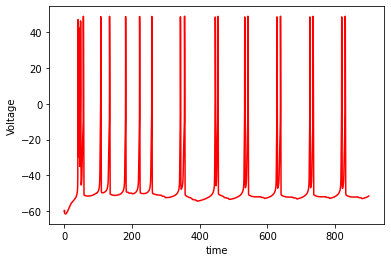

In [26]:
plt.plot(z[0],z[1],'r')

#plt.plot(z[0],z[2],'b')
plt.xlabel("time")

plt.ylabel("Voltage")
plt.show()

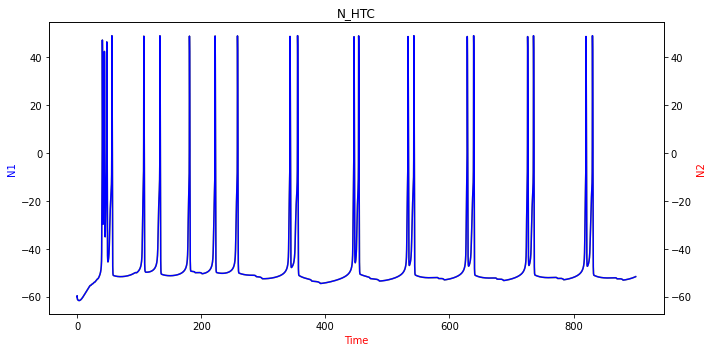

In [28]:
# y-axis values
y1 = z[1]
 
# secondary y-axis values
y2 = z[6]
 
# plotting figures by creating aexs object
# using subplots() function
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('N_HTC')
 
# using the twinx() for creating another
# axes object for secondary y-Axis
ax2 = ax.twinx()
ax.plot(z[0], y1, color = 'y')
ax2.plot(z[0], y2, color = 'b')
 
# giving labels to the axises
ax.set_xlabel('Time', color = 'r')
ax.set_ylabel('N1', color = 'b')
 
# secondary y-axis label
ax2.set_ylabel('N2', color = 'r')
 
# defining display layout
plt.tight_layout()
 
# show plot
plt.show()